In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [3]:
print(len(df))

1653


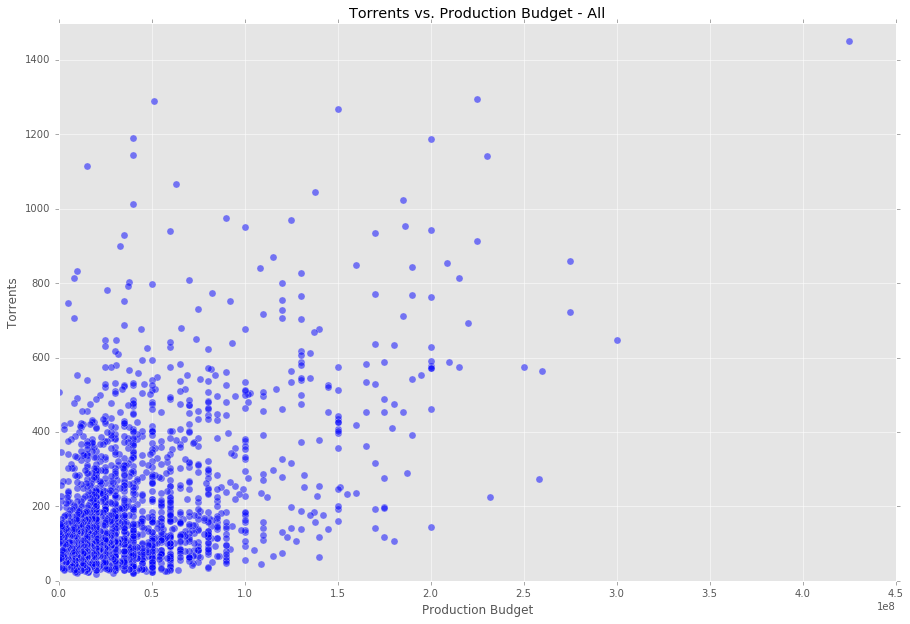

In [4]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df['Prod_Budget'], df['Total_Torrents'], alpha=0.5, s=50)

In [5]:
# unique list of grouped genres as a string
unq_genres = df['Genre'].unique()
unq_genres = unq_genres.tolist()

# unique list of grouped genres as a list of genres
lst_grp_genres = []
for lst in unq_genres:
    temp = []
    for genre in lst.split(','):
         temp.append(genre)
    lst_grp_genres.append(temp)
    
#print(len(lst_grp_genres))
#print(lst_grp_genres[:10])
print(len(unq_genres))
print(unq_genres[:10])

242
['Action, Adventure, Fantasy', 'Action, Adventure, Thriller', 'Action, Adventure, Drama', 'Action, Adventure, Sci-Fi', 'Animation, Adventure, Comedy', 'Action, Adventure', 'Adventure, Family, Fantasy', 'Action, Adventure, Comedy', 'Action, Sci-Fi', 'Drama, Romance']


In [6]:
# unique list of individual genres
ind_genre = set()

for lst in unq_genres:
    for genre in lst.split(','):
        ind_genre.add(genre.strip())
ind_genre = sorted(ind_genre)

print(len(ind_genre))
print(ind_genre)

20
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [7]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for genre in ind_genre:
    count[genre] = df.Genre.str.contains(genre).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
print(srt)

[('Drama', 677), ('Comedy', 620), ('Action', 547), ('Adventure', 359), ('Crime', 355), ('Thriller', 336), ('Romance', 258), ('Horror', 207), ('Mystery', 171), ('Sci-Fi', 171), ('Fantasy', 157), ('Family', 127), ('Biography', 70), ('Animation', 64), ('Sport', 57), ('Music', 51), ('History', 34), ('War', 25), ('Western', 16), ('Musical', 11)]


In [56]:
def split_to_array(ser):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    return pd.Series(split_array)

genres = df.Genre.apply(split_to_array)
genres = pd.Series(genres.values.ravel()).dropna()
genres = genres.value_counts().sort_values(ascending=False)

In [62]:
def convert_frequency(ser, genres=genres):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    genre = genres.loc[split_array].argmax()
    return genre

df['Genre_Single'] = df.Genre.apply(convert_frequency)

In [63]:
df_test=df[['Genre','Genre_Single']]
print(df_test.head(20))

                           Genre Genre_Single
0     Action, Adventure, Fantasy       Action
1    Action, Adventure, Thriller       Action
2       Action, Adventure, Drama        Drama
3      Action, Adventure, Sci-Fi       Action
4   Animation, Adventure, Comedy       Comedy
5              Action, Adventure       Action
6     Adventure, Family, Fantasy    Adventure
7      Action, Adventure, Sci-Fi       Action
8              Action, Adventure       Action
9      Action, Adventure, Sci-Fi       Action
10    Action, Adventure, Fantasy       Action
11    Action, Adventure, Fantasy       Action
12     Action, Adventure, Sci-Fi       Action
13     Action, Adventure, Comedy       Comedy
14      Action, Adventure, Drama        Drama
15     Action, Adventure, Sci-Fi       Action
16    Adventure, Family, Fantasy    Adventure
17    Action, Adventure, Fantasy       Action
18     Action, Adventure, Sci-Fi       Action
19  Animation, Adventure, Comedy       Comedy


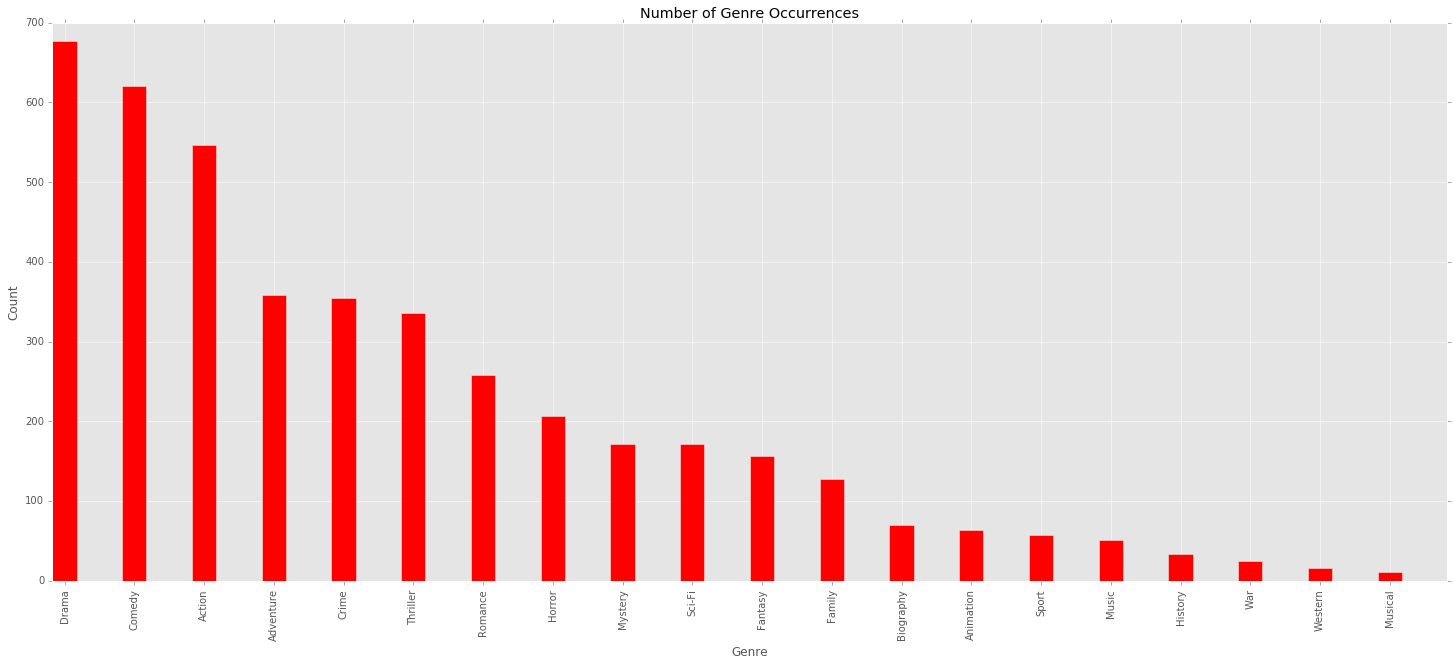

In [64]:
plt.figure(figsize=(25,10))

ind = np.arange(len(count)) # the x locations for the groups
width = 0.35 # the width of the bars

bar_genre = [genre for genre, count in srt]
bar_count = [count for genre, count in srt]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Number of Genre Occurrences')
plt.xticks(ind + width/2., (bar_genre), rotation='vertical')
plt.yticks(np.arange(0, 701, 100))

plt.show()

In [65]:
# return tuple of (string, list)
tup_lst = []
for genre_gp in unq_genres:
    temp = []
    for genre in genre_gp.split():
        temp.append(genre)
    tup_lst.append((genre_gp, temp))

In [67]:
def srch_lst(term, t_lst):
    srch = []
    for st, lst in t_lst:
        if term in st:
            srch.append(st)
    return srch
#print(srch_lst('Comedy', tup_lst))

677


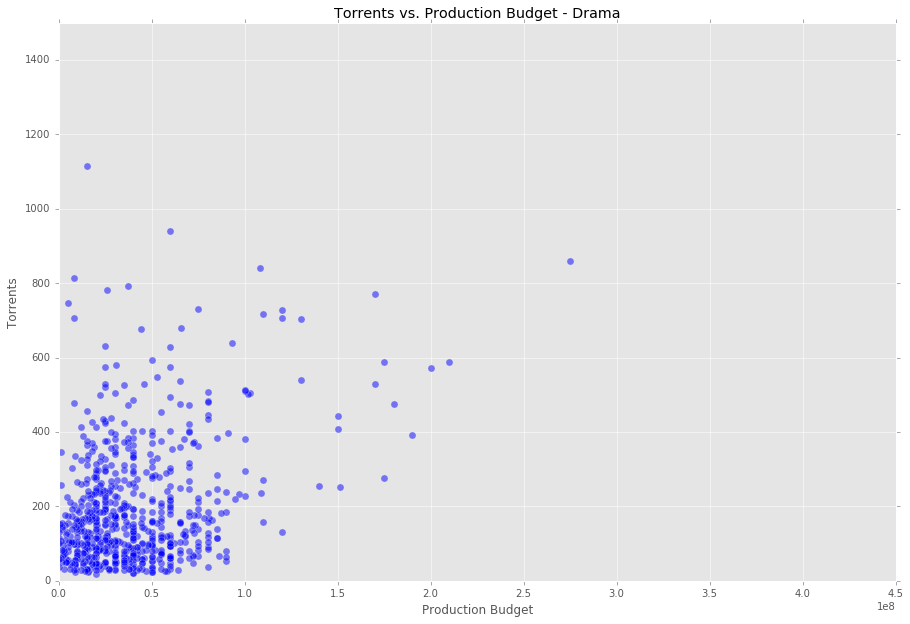

In [68]:
term = 'Drama'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

620


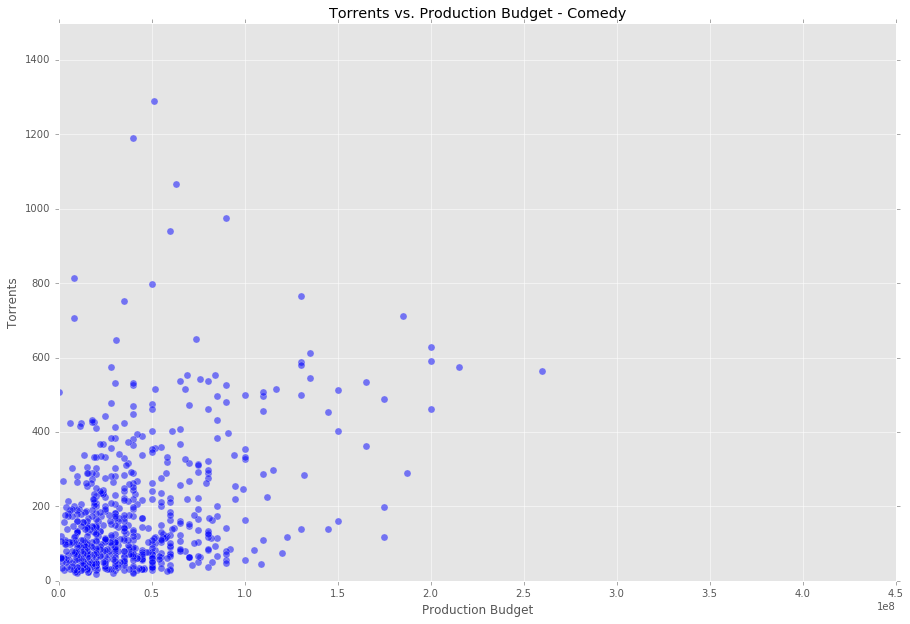

In [69]:
term = 'Comedy'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

547


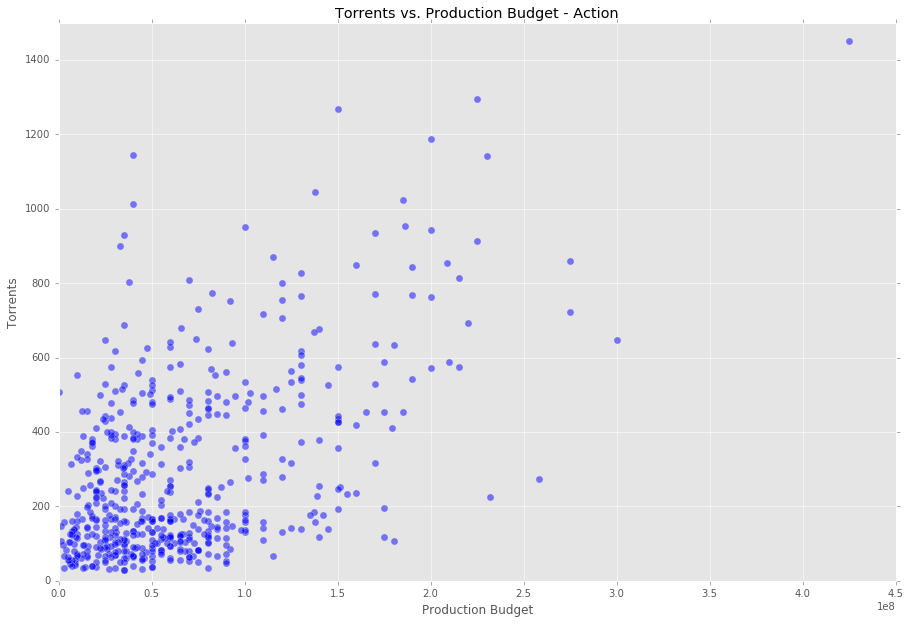

In [70]:
term = 'Action'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [71]:
df_sub = df[['Prod_Budget', 'Genre_Single', 'Total_Torrents']]
df_sub.describe()

,Prod_Budget,Total_Torrents
count,1.653000e+03,1653.000000
mean,4.766387e+07,223.719903
std,4.434656e+07,196.768665
min,6.800000e+04,17.000000
25%,1.800000e+07,89.000000
50%,3.500000e+07,158.000000
75%,6.000000e+07,299.000000
max,4.250000e+08,1450.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1162a54a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116805080>]], dtype=object)

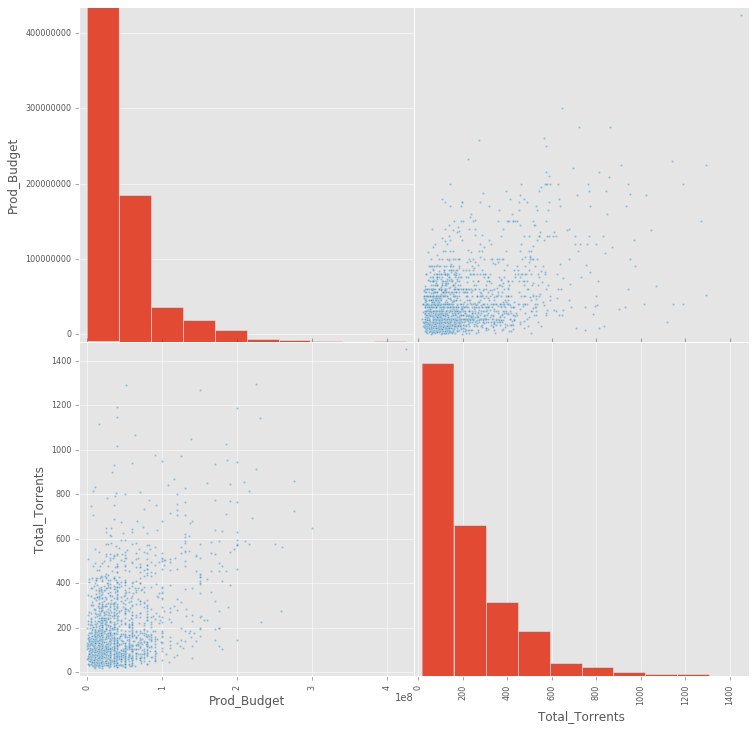

In [72]:
# Lets take a look at our entire model
plt.rcParams['figure.figsize'] = (12, 12)
pd.tools.plotting.scatter_matrix(df_sub)

In [73]:
from patsy import dmatrices

y, x = dmatrices('Total_Torrents ~ Prod_Budget + Genre_Single', data=df_sub, return_type='dataframe')

In [74]:
y.head()

,Total_Torrents
0,1450.0
1,647.0
2,861.0
3,723.0
4,563.0


In [75]:
x.head()

,Intercept,Genre_Single[T.Adventure],Genre_Single[T.Comedy],Genre_Single[T.Crime],Genre_Single[T.Drama],Genre_Single[T.Fantasy],Genre_Single[T.Horror],Genre_Single[T.Romance],Genre_Single[T.Thriller],Genre_Single[T.Western],Prod_Budget
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425000000.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000000.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,275000000.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275000000.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260000000.0


In [76]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()

#results.summary()

In [78]:
import statsmodels.formula.api as smf

results = smf.ols(formula='Total_Torrents ~ Prod_Budget + Genre_Single', data=df_sub,).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     53.45
Date:                Wed, 13 Jul 2016   Prob (F-statistic):           2.36e-93
Time:                        15:55:21   Log-Likelihood:                -10843.
No. Observations:                1653   AIC:                         2.171e+04
Df Residuals:                    1642   BIC:                         2.177e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                   185.5752     12.644     14.677      0.000       160.775   210.376
Genre_Single[T.Adventure]  -119.6651     29.247     -4.092      0.000      -177.030   -62.300
Genre_Single[T.Comedy]      -77.5315     13.073     -5.931      0.000      -103.172   -51.891
Genre_Single[T.Crime]       -96.6368     34.622     -2.791      0.005      -164.544   -28.730
Genre_Single[T.Drama]       -69.8271     12.487     -5.592      0.000       -94.318   -45.336
Genre_Single[T.Fantasy]     -55.5154    171.880     -0.323      0.747      -392.643   281.612
Genre_Single[T.Horror]        0.6204     23.267      0.027      0.979       -45.015    46.256
Genre_Single[T.Romance]     -98.1164    121.747     -0.806      0.420      -336.911   140.679
Genre_Single[T.Thriller]    -22.8708     24.244     -0.943      0.346       -70.423    24.682
Genre_Single[T.Western]    -107.3515    121.836     -0.881      0.378      -346.323   131.620
Prod_Budget                 1.98e-06   1.03e-07     19.246      0.000      1.78e-06  2.18e-06
==============================================================================
Omnibus:                      533.385   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1998.808
Skew:                           1.546   Prob(JB):                         0.00
Kurtosis:                       7.412   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
model.score(x, y)

0.24557542377137243

In [81]:
model.coef_

array([[  0.00000000e+00,  -1.19665081e+02,  -7.75315463e+01,
         -9.66367790e+01,  -6.98270640e+01,  -5.55153659e+01,
          6.20430479e-01,  -9.81164067e+01,  -2.28707593e+01,
         -1.07351532e+02,   1.98005204e-06]])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115015ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11501ab38>]], dtype=object)

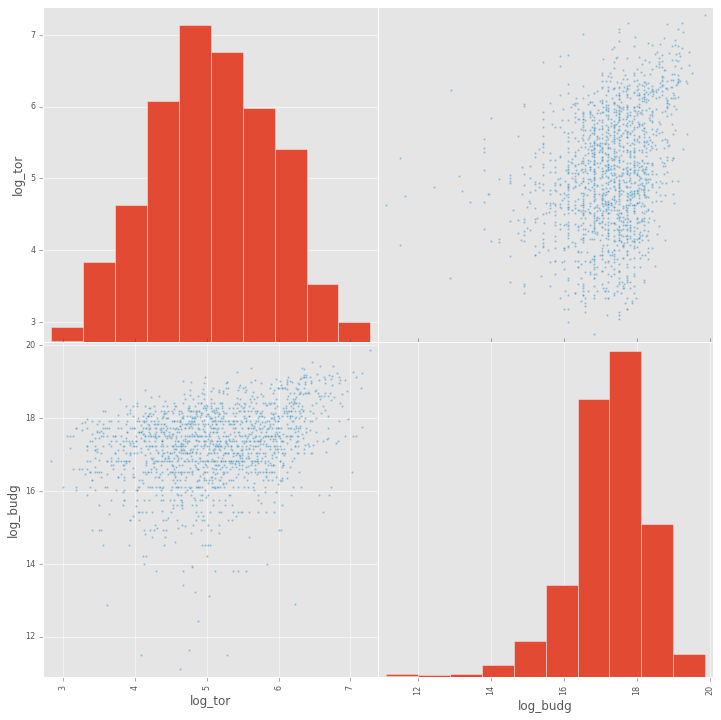

In [82]:
#data.yr=data.yr.replace({0:.25})

df_sub['log_tor']=np.log(df_sub.Total_Torrents)
df_sub['log_budg']=np.log(df_sub.Prod_Budget)

trans=df_sub[['log_tor','log_budg']]
pd.tools.plotting.scatter_matrix(trans)

In [83]:
y, x = dmatrices('log_tor ~ log_budg + Genre_Single', data=df_sub, return_type='dataframe')
x.head()

,Intercept,Genre_Single[T.Adventure],Genre_Single[T.Comedy],Genre_Single[T.Crime],Genre_Single[T.Drama],Genre_Single[T.Fantasy],Genre_Single[T.Horror],Genre_Single[T.Romance],Genre_Single[T.Thriller],Genre_Single[T.Western],log_budg
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.867600
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.519293
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.432282
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.432282
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.376192


In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

model.score(x,y)

0.13832172703346535

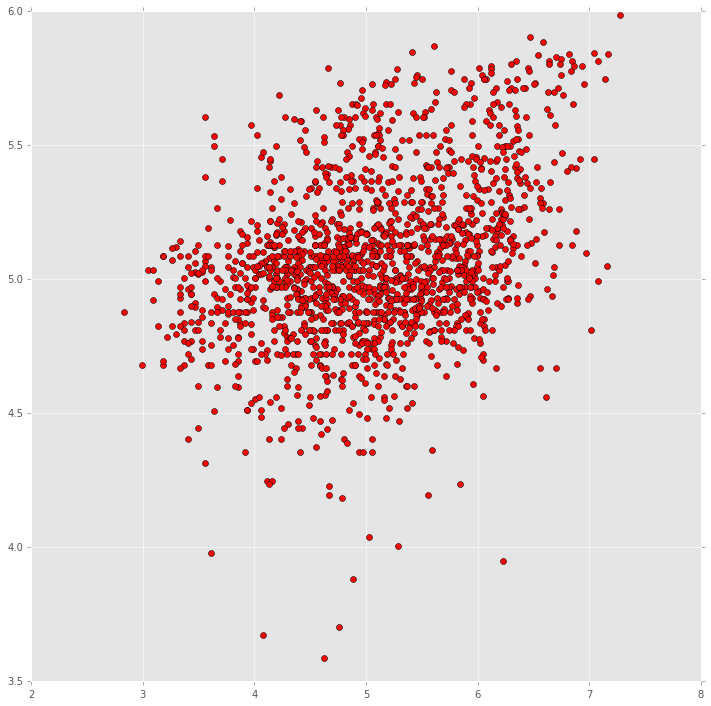

In [86]:
_ = plt.plot(y, model.predict(x), 'ro')

In [87]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.333,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

In [88]:
metrics.mean_squared_error(y_train,model.predict(x_train))

0.57608800789339143

In [89]:
model.score(x_train, y_train)

0.16305970924893765

In [90]:
metrics.mean_squared_error(y_test,model.predict(x_test))

0.65799897831527421

In [92]:
# reset x, y otherwise errors occur
y, x = dmatrices('log_tor ~ log_budg + Genre_Single', data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=100, shuffle=True)

for train_index, test_index in kf:
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

clf2.score(x,y)

0.13827186986799156